In [54]:
#merge UserDetails,CookingSessions,OrderDetails sheets
import pandas as pd

# Load the data from each sheet
user_details = pd.read_excel("Data Analyst Intern Assignment - Excel.xlsx", sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel("Data Analyst Intern Assignment - Excel.xlsx", sheet_name='CookingSessions.csv')
order_details = pd.read_excel("Data Analyst Intern Assignment - Excel.xlsx", sheet_name='OrderDetails.csv')

# Merge the DataFrames
merged_df = pd.merge(user_details, cooking_sessions, on='User ID', how='inner')  # User Details + Cooking Sessions
merged_df = pd.merge(merged_df, order_details, on='User ID', how='inner')  # Add Order Details

# Save the merged data to a new file
merged_df.to_excel('MergedDataAnalysis.xlsx', index=False)
merged_df.head()




,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID_x,...,Session Rating,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating,Session ID_y
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
3,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
4,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004


In [19]:
#check null values
merged_df.isnull().sum()

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
Session ID_x         0
Dish Name_x          0
Meal Type_x          0
Session Start        0
Session End          0
Duration (mins)      0
Session Rating       0
Order ID             0
Order Date           0
Meal Type_y          0
Dish Name_y          0
Order Status         0
Amount (USD)         0
Time of Day          0
Rating               6
Session ID_y         0
dtype: int64

In [21]:
# Convert 'Order Date', 'Session Start', 'Session End' to datetime
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'])
merged_df['Session Start'] = pd.to_datetime(merged_df['Session Start'])
merged_df['Session End'] = pd.to_datetime(merged_df['Session End'])

In [22]:
# Handling Missing Values 
merged_df['Rating'].fillna(merged_df['Rating'].mean(), inplace=True)

C:\Users\Jains\AppData\Local\Temp\ipykernel_13928\1579717976.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Rating'].fillna(merged_df['Rating'].mean(), inplace=True)


In [23]:
#After Imputation check is there any null values present
merged_df.isnull().sum()

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
Session ID_x         0
Dish Name_x          0
Meal Type_x          0
Session Start        0
Session End          0
Duration (mins)      0
Session Rating       0
Order ID             0
Order Date           0
Meal Type_y          0
Dish Name_y          0
Order Status         0
Amount (USD)         0
Time of Day          0
Rating               0
Session ID_y         0
dtype: int64

In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            38 non-null     object        
 1   User Name          38 non-null     object        
 2   Age                38 non-null     int64         
 3   Location           38 non-null     object        
 4   Registration Date  38 non-null     datetime64[ns]
 5   Phone              38 non-null     object        
 6   Email              38 non-null     object        
 7   Favorite Meal      38 non-null     object        
 8   Total Orders       38 non-null     int64         
 9   Session ID_x       38 non-null     object        
 10  Dish Name_x        38 non-null     object        
 11  Meal Type_x        38 non-null     object        
 12  Session Start      38 non-null     datetime64[ns]
 13  Session End        38 non-null     datetime64[ns]
 14  Duration (mi

In [25]:
merged_df.duplicated().sum()

0

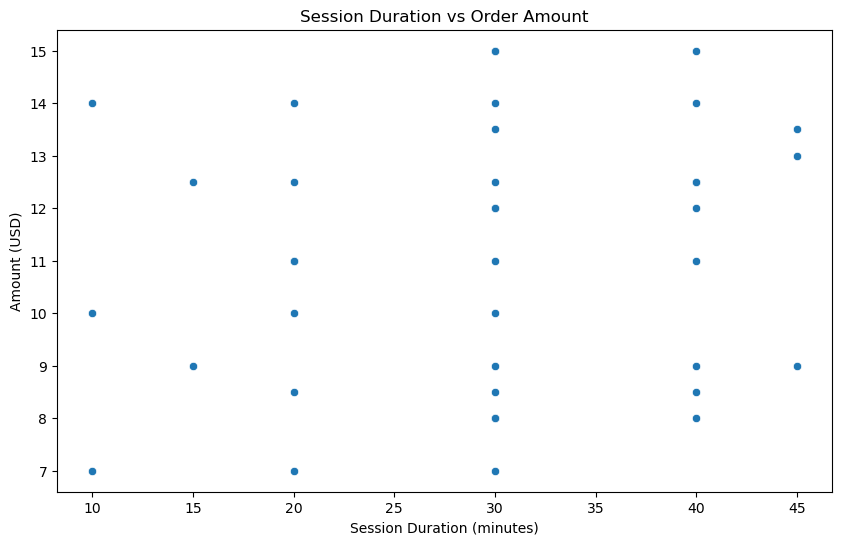

In [28]:
# Analyze the relationship between Cooking Sessions and Orders
# Correlation between Session Duration and Order Amount

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (mins)', y='Amount (USD)', data=merged_df)
plt.title('Session Duration vs Order Amount')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Amount (USD)')
plt.show()

C:\Users\Jains\AppData\Local\Temp\ipykernel_13928\1603098173.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order ID', y='User Name', data=orders_per_user, palette='viridis')


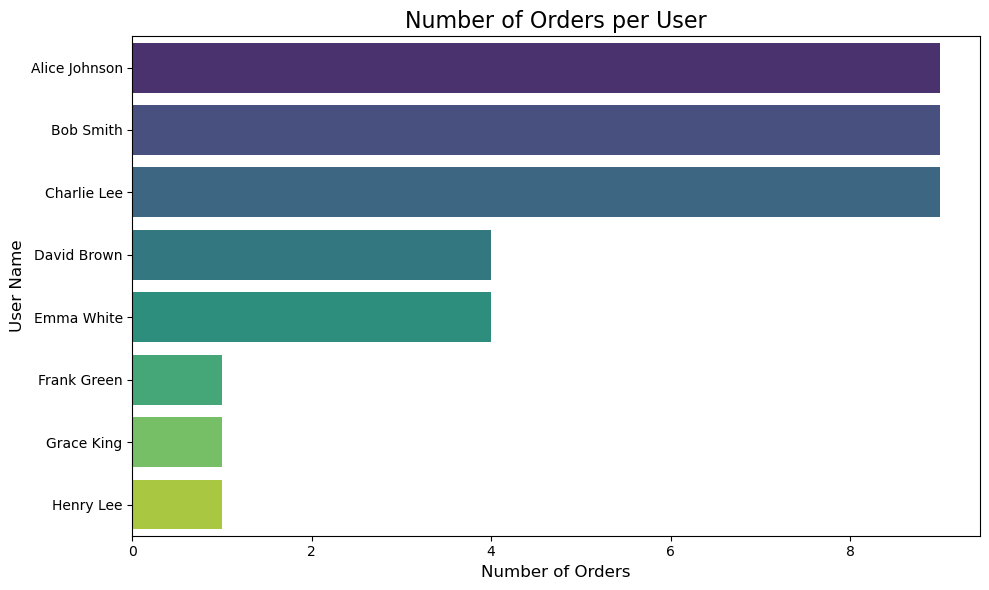

In [30]:
# 2. Number of Orders per User
orders_per_user = merged_df.groupby('User Name')['Order ID'].count().reset_index()
orders_per_user = orders_per_user.sort_values(by='Order ID', ascending=False)

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Order ID', y='User Name', data=orders_per_user, palette='viridis')

# Set the title and labels
plt.title('Number of Orders per User', fontsize=16)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('User Name', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\Jains\AppData\Local\Temp\ipykernel_13928\726239007.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Session Rating', y='Meal Type_x', data=avg_session_rating_by_meal, palette='coolwarm')


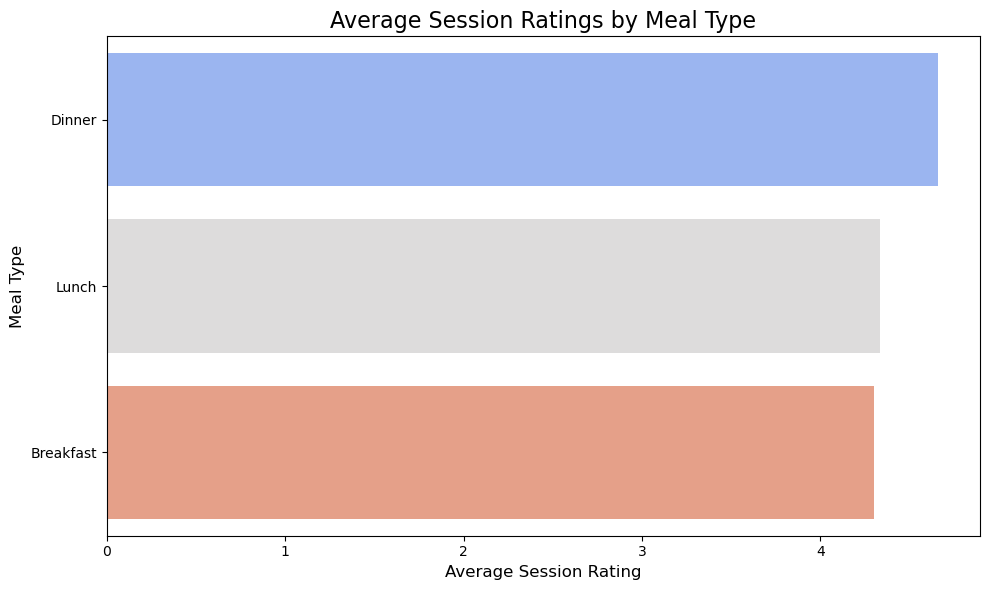

In [33]:
# Average session ratings by Meal Typeavg_session_rating_by_meal
avg_session_rating_by_meal = avg_session_rating_by_meal.sort_values(by='Session Rating', ascending=False)

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Session Rating', y='Meal Type_x', data=avg_session_rating_by_meal, palette='coolwarm')

# Set the title and labels
plt.title('Average Session Ratings by Meal Type', fontsize=16)
plt.xlabel('Average Session Rating', fontsize=12)
plt.ylabel('Meal Type', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\Jains\AppData\Local\Temp\ipykernel_13928\3189899202.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Dish Name_y', data=popular_dishes, palette='viridis')


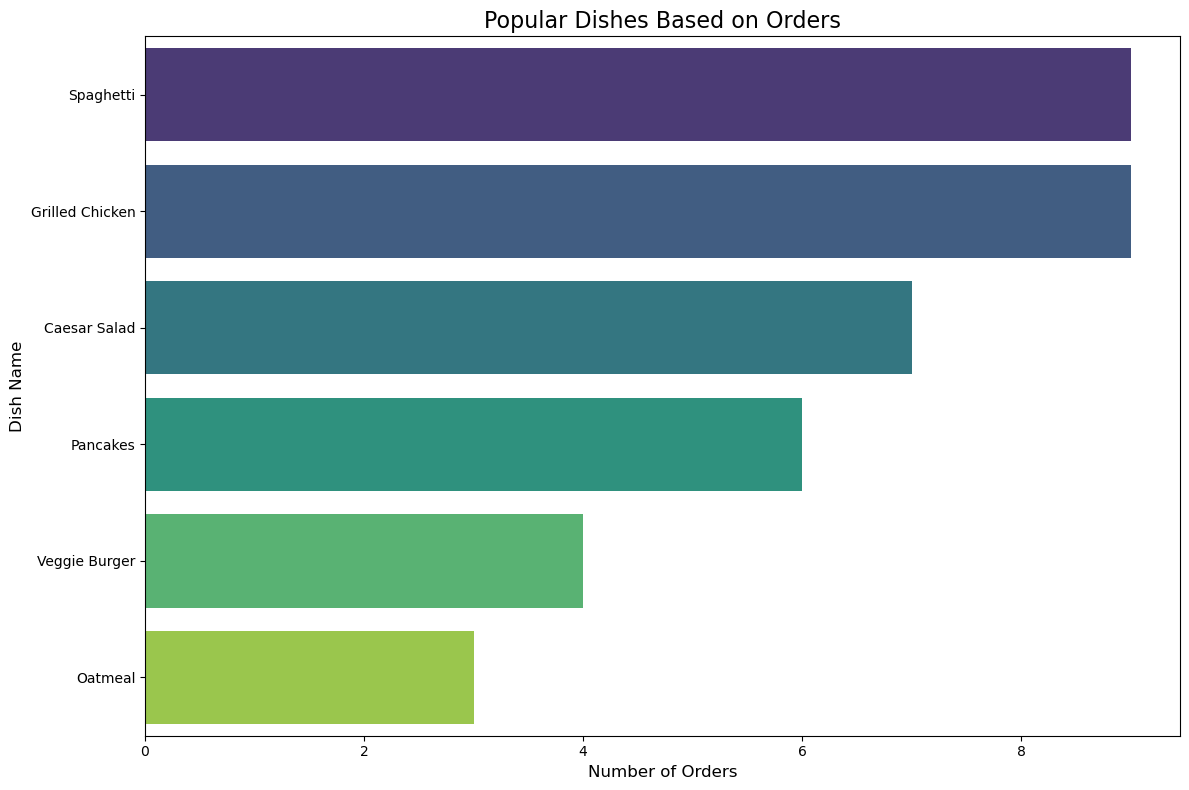

In [37]:
# 4. Popular Dishes based on orders
popular_dishes = merged_df['Dish Name_y'].value_counts().reset_index()
popular_dishes.columns = ['Dish Name_y', 'Count']
# Create a bar plot to visualize the most popular dishes
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Dish Name_y', data=popular_dishes, palette='viridis')

# Set the title and labels
plt.title('Popular Dishes Based on Orders', fontsize=16)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Dish Name', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

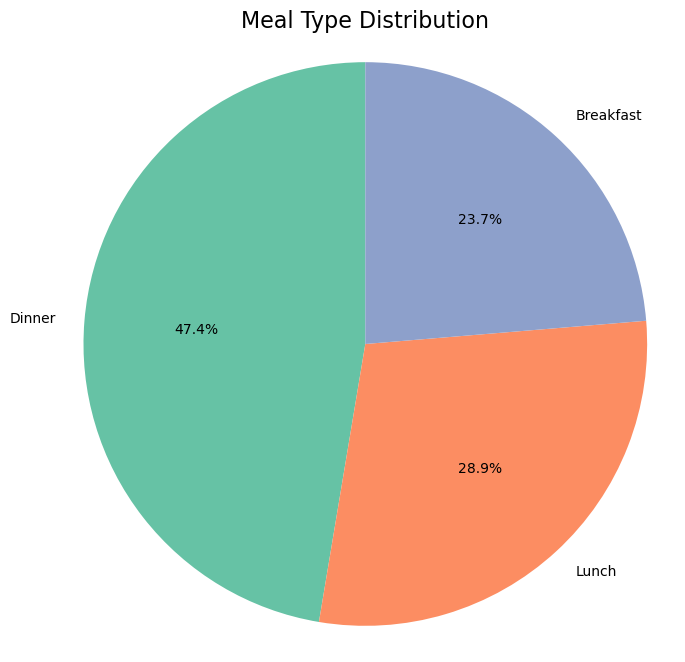

In [39]:
#  Meal Type Distribution
import matplotlib.pyplot as plt
meal_type_distribution = merged_df['Meal Type_x'].value_counts()


# Create a pie chart to show the distribution of meal types
plt.figure(figsize=(8, 8))
plt.pie(meal_type_distribution, labels=meal_type_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(meal_type_distribution)))

# Set the title
plt.title('Meal Type Distribution', fontsize=16)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


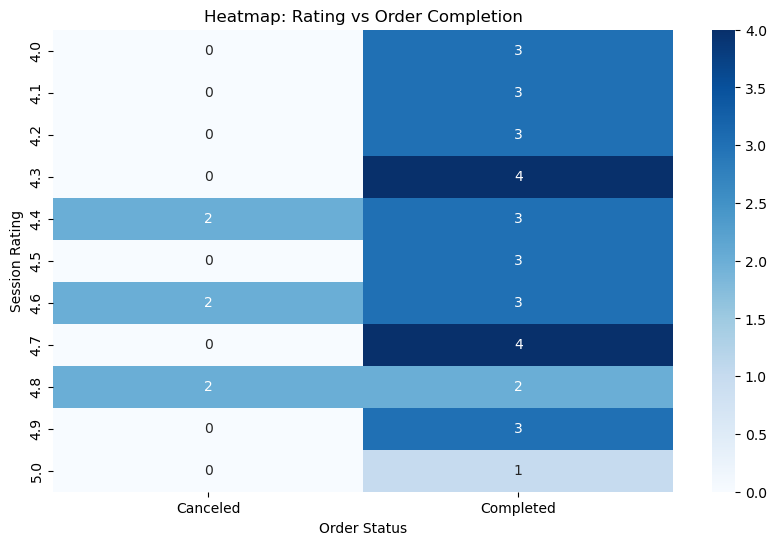

In [40]:
# 3. Heatmap: Rating vs. Order Completion
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(merged_df['Session Rating'], merged_df['Order Status']), annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap: Rating vs Order Completion')
plt.show()

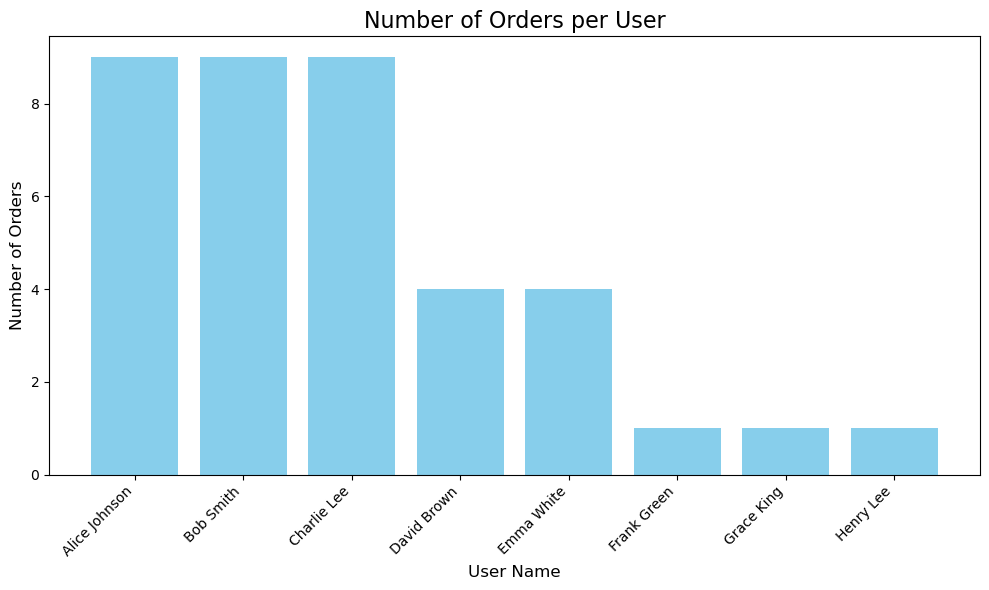

In [41]:
# Average session ratings by meal type
avg_session_rating_by_meal = merged_df.groupby('Meal Type')['Session Rating'].mean().reset_index()

# Create a bar chart for average session ratings by meal type
plt.figure(figsize=(10, 6))
plt.bar(avg_session_rating_by_meal['Meal Type'], avg_session_rating_by_meal['Session Rating'], color='lightcoral')
plt.xlabel('Meal Type', fontsize=12)
plt.ylabel('Average Session Rating', fontsize=12)
plt.title('Average Session Ratings by Meal Type', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


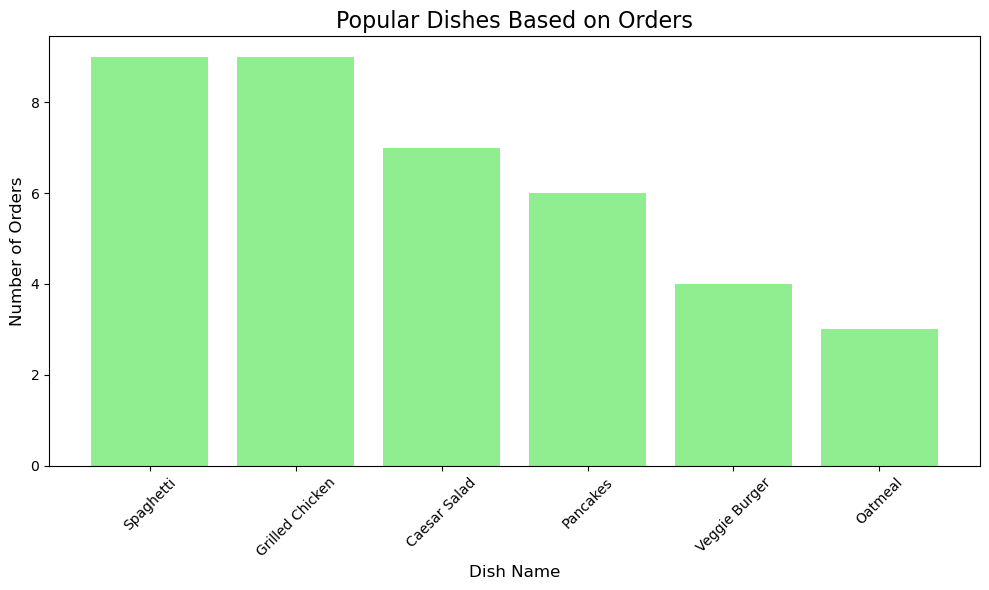

In [44]:
# Popular dishes based on orders
popular_dishes = merged_df['Dish Name_y'].value_counts().reset_index()
popular_dishes.columns = ['Dish Name', 'Count']

# Create a bar chart for popular dishes
plt.figure(figsize=(10, 6))
plt.bar(popular_dishes['Dish Name'], popular_dishes['Count'], color='lightgreen')
plt.xlabel('Dish Name', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Popular Dishes Based on Orders', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


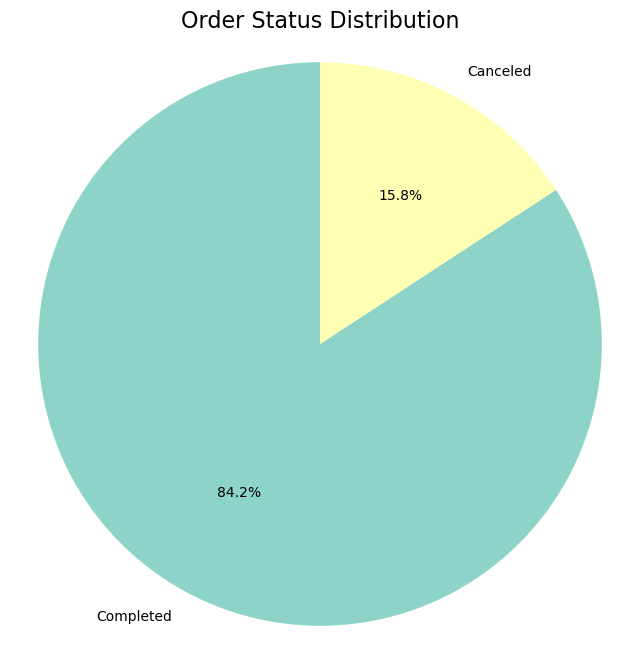

In [45]:
# Order Status distribution
order_status_distribution = merged_df['Order Status'].value_counts()

# Create a pie chart for order status distribution
plt.figure(figsize=(8, 8))
plt.pie(order_status_distribution, labels=order_status_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(order_status_distribution)))

# Set the title
plt.title('Order Status Distribution', fontsize=16)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


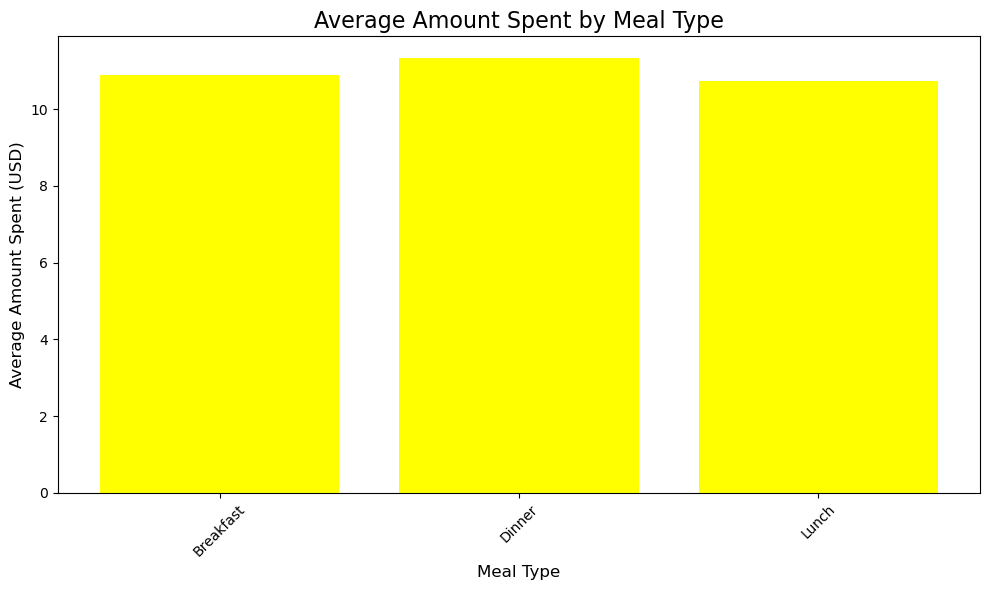

In [47]:
# Average amount spent by meal type
avg_amount_spent_by_meal = merged_df.groupby('Meal Type_x')['Amount (USD)'].mean().reset_index()

# Create a bar chart for average amount spent by meal type
plt.figure(figsize=(10, 6))
plt.bar(avg_amount_spent_by_meal['Meal Type_x'], avg_amount_spent_by_meal['Amount (USD)'], color='yellow')
plt.xlabel('Meal Type', fontsize=12)
plt.ylabel('Average Amount Spent (USD)', fontsize=12)
plt.title('Average Amount Spent by Meal Type', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


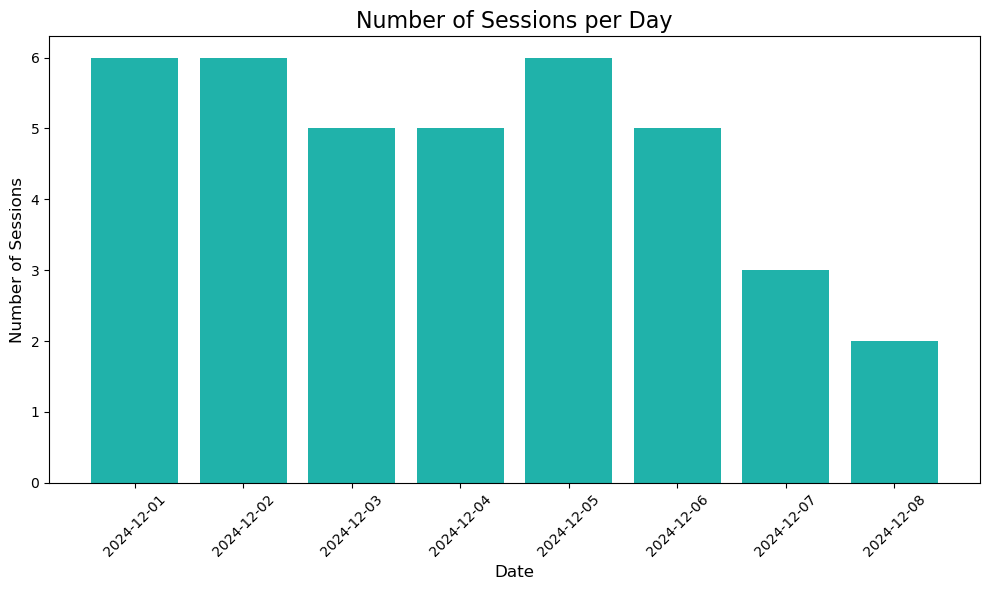

In [48]:
# Number of sessions per day
sessions_per_day = merged_df['Session Start'].dt.date.value_counts().sort_index()

# Create a bar chart for sessions per day
plt.figure(figsize=(10, 6))
plt.bar(sessions_per_day.index, sessions_per_day.values, color='lightseagreen')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sessions', fontsize=12)
plt.title('Number of Sessions per Day', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


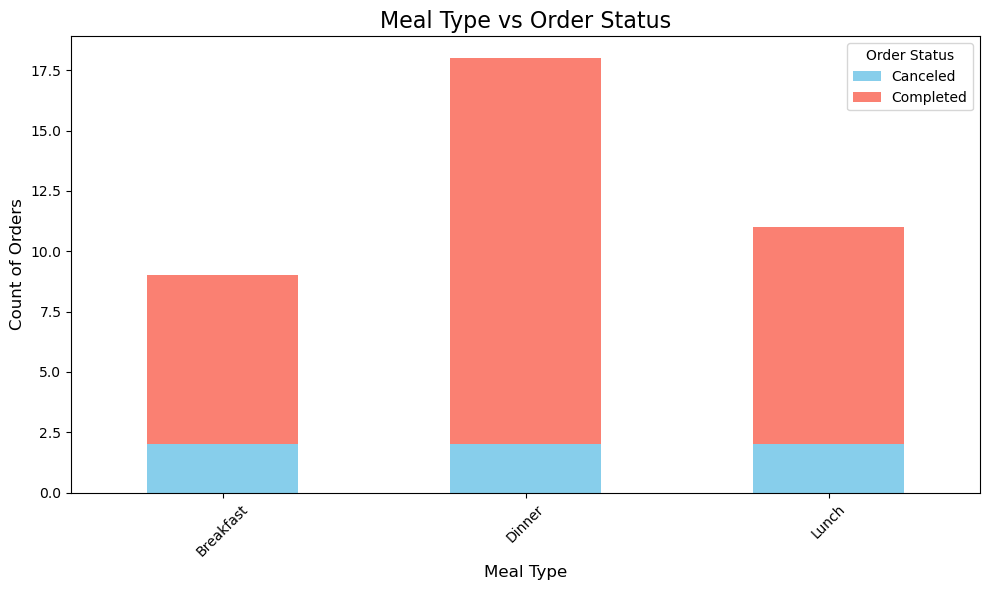

In [49]:
# Meal type vs Order status
meal_order_status = merged_df.groupby(['Meal Type_x', 'Order Status']).size().unstack().fillna(0)

# Create a stacked bar chart for meal type vs order status
meal_order_status.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('Meal Type', fontsize=12)
plt.ylabel('Count of Orders', fontsize=12)
plt.title('Meal Type vs Order Status', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


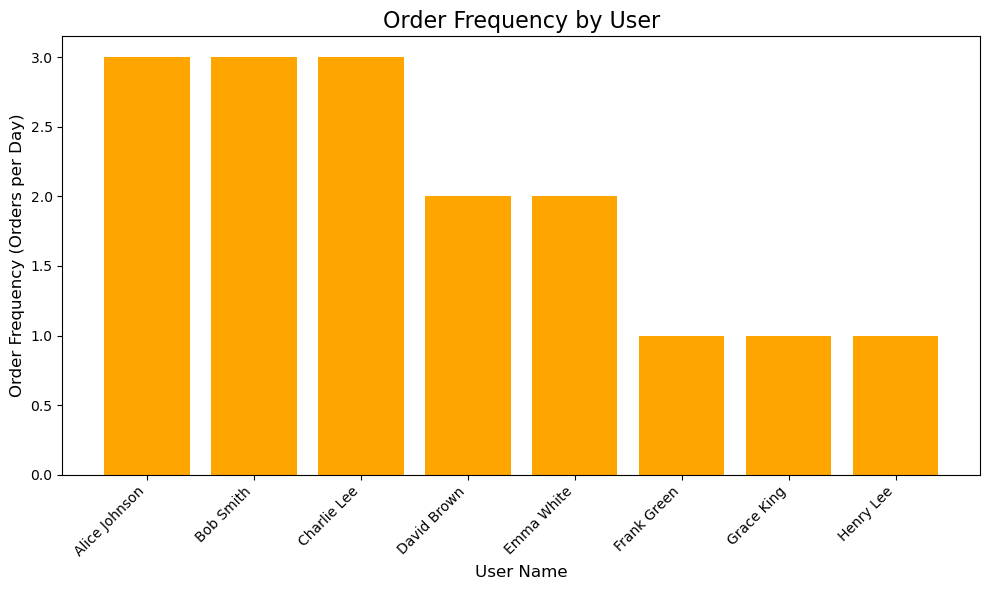

In [50]:
# Order frequency by user (average number of orders per day)
order_frequency_by_user = merged_df.groupby('User Name')['Order ID'].count() / (merged_df.groupby('User Name')['Order Date'].nunique())

# Create a bar chart for order frequency by user
plt.figure(figsize=(10, 6))
plt.bar(order_frequency_by_user.index, order_frequency_by_user.values, color='orange')
plt.xlabel('User Name', fontsize=12)
plt.ylabel('Order Frequency (Orders per Day)', fontsize=12)
plt.title('Order Frequency by User', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


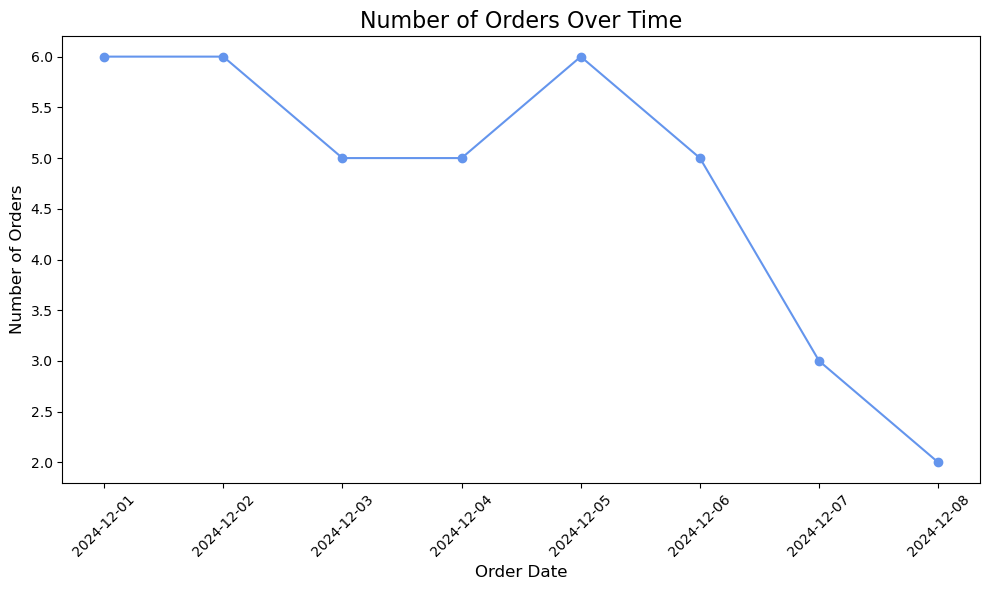

In [51]:
# Number of orders per day
orders_per_day = merged_df.groupby('Order Date')['Order ID'].count()

# Create a time series plot for number of orders over time
plt.figure(figsize=(10, 6))
plt.plot(orders_per_day.index, orders_per_day.values, marker='o', color='cornflowerblue')
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Number of Orders Over Time', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
